In [1]:
import sys

import eeg_decoder
import similarity_analyses
import numpy as np
from collections import defaultdict
%load_ext autoreload
%autoreload 2

Using Intel optimizations for sklearn


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### your experiment object here 

In [6]:
sys.path.append('Z:/Darius')
from eeg_processing import Experiment
exp=Experiment(name='AVSpt',data_file='C:/Users/Eds Lab/data_files/AVC_subjectData.hdf5')


### Calculate RDMs and output them to a file

In [14]:
condition_dict={'A1':11,'A2':12,'V1':21,'V2':22,'C1':31,'C2':32}
cr = similarity_analyses.Crossnobis(exp,condition_dict=condition_dict,n_splits=100)
cr.calculate_rdms(overwrite=True)

100%|██████████| 24/24 [02:27<00:00,  6.17s/it]


### Define RDMs

In [15]:
conditions = ['A1', 'A2', 'V1', 'V2', 'C1', 'C2']
factors = ['PointerLoad', 'AuditoryLoad', 'VisualLoad', 'FeatureLoad','GradientAF']

condition_details = {
    'A1': {'PointerLoad': 1, 'AuditoryLoad': 1, 'VisualLoad': 0, 'FeatureLoad': 1,'GradientAF':0},
    'A2': {'PointerLoad': 2, 'AuditoryLoad': 2, 'VisualLoad': 0, 'FeatureLoad': 2,'GradientAF':0},
    'V1': {'PointerLoad': 1, 'AuditoryLoad': 0, 'VisualLoad': 1, 'FeatureLoad': 1,'GradientAF':2},
    'V2': {'PointerLoad': 2, 'AuditoryLoad': 0, 'VisualLoad': 2, 'FeatureLoad': 2,'GradientAF':2},
    'C1': {'PointerLoad': 1, 'AuditoryLoad': 1, 'VisualLoad': 1, 'FeatureLoad': 2,'GradientAF':1},
    'C2': {'PointerLoad': 2, 'AuditoryLoad': 2, 'VisualLoad': 2, 'FeatureLoad': 4,'GradientAF':1}
}
labels=list(condition_details.keys())

theoretical_models = defaultdict(lambda:np.zeros((len(conditions), len(conditions))))

for factor in factors:
    for i, condi in enumerate(condition_details):
        for j, condj in enumerate(condition_details):
            theoretical_models[factor][i, j] = np.abs(condition_details[condi][factor] - condition_details[condj][factor])
# add load models
theoretical_models['IndependentAF']=np.array([[0,0,1,1,1,1],
                                    [0,0,1,1,1,1],
                                    [1,1,0,0,1,1],
                                    [1,1,0,0,1,1],
                                    [1,1,1,1,0,0],
                                    [1,1,1,1,0,0]])

factors.append('IndependentAF')
            
            
rsa = similarity_analyses.RSA(conditions,np.arange(-275,1475,25),delay_period_start=500,theoretical_models=theoretical_models)

### Fit all models and apply them

In [29]:
rsa.fit_theoretical_models(ret_VIF=True)


c:\Users\Eds Lab\miniconda3\envs\mvLoad\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


       regressor       VIF
0    PointerLoad  1.485836
1   AuditoryLoad  2.059907
2     VisualLoad  2.059907
3    FeatureLoad  1.621202
4     GradientAF  5.563542
5  IndependentAF  2.863517
6      Intercept  0.000000


#### Correlations over delay period

PointerLoad 0.10869273941176681 45.0 0.0017795562744140625
AuditoryLoad 0.08959682025657578 74.0 0.029131293296813965
VisualLoad 0.08277023534002588 86.0 0.06910169124603271
FeatureLoad -0.028294608312536263 141.0 0.8115357160568237
GradientAF 0.09236684926017043 90.0 0.08937323093414307
IndependentAF -0.039096332828303805 118.0 0.37475037574768066


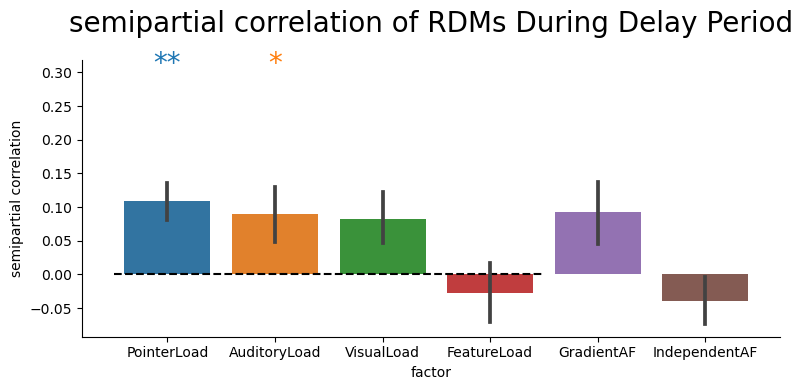

In [30]:
rsa.plot_corrs()

#### Correlations over time

<Axes: title={'center': 'Model Fits across time'}, xlabel='timepoint', ylabel='semipartial correlation'>

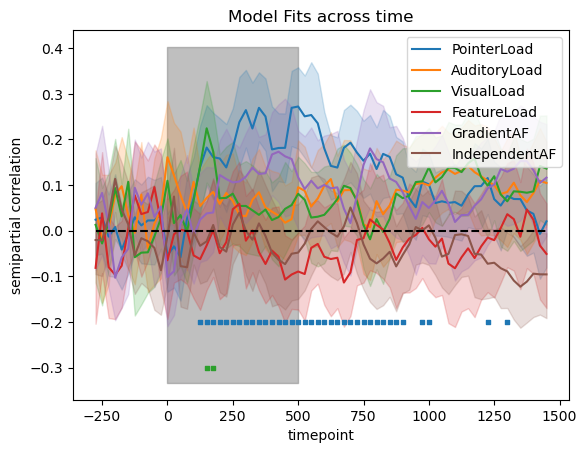

In [32]:
rsa.plot_corrs_temporal()

#### Correlations between regressors

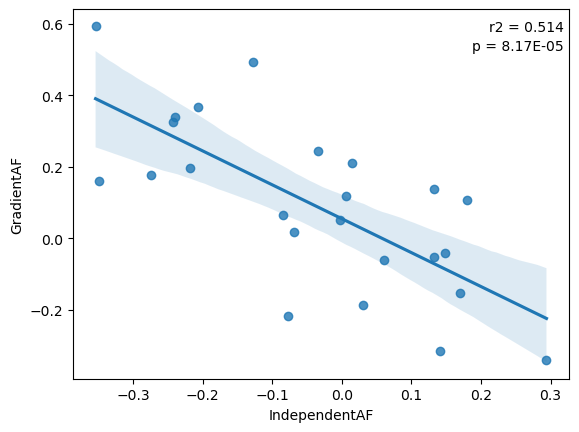

In [35]:
rsa.correlate_regressors('IndependentAF','GradientAF') # demo of regression correlations

### MDS

In [36]:
mds = similarity_analyses.MDS(np.arange(-275,1475,25),conditions)

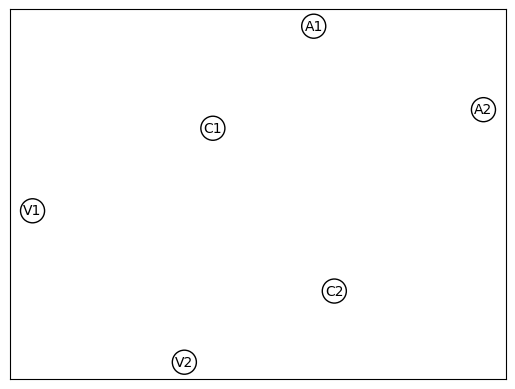

In [37]:
mds.plot_MDS()